In [2]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['errorbar.capsize'] = 12
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False

(400, 96, 16)
583.177943725586
354686.2294531251 5.4427308602385525


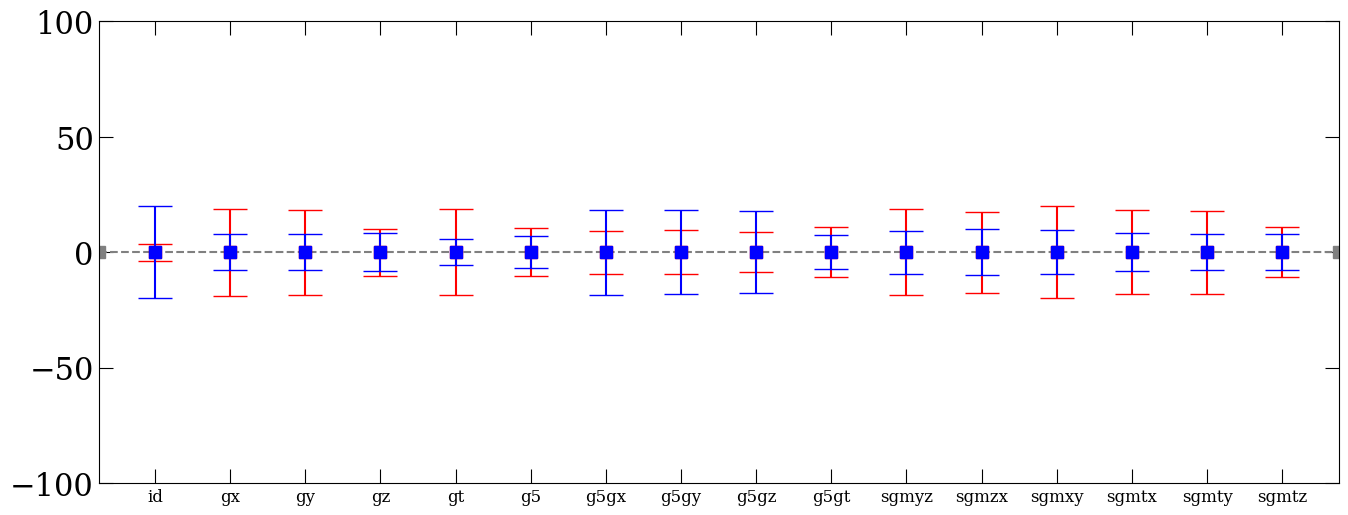

In [33]:
path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/FromPizdaint/NST_f/cA2.09.48/loop/out/a0340/loopL.h5'
# path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/FromPizdaint/NST_f/cA211.53.24/loop/out/a0000/loopL.h5'
with h5py.File(path) as f:
    data=np.array([f['data'][seed][id]['up'][:,3] for seed in f['data'].keys() for id in f['data'][seed].keys()])
    print(data.shape)
    Gs=[ele.decode() for ele in f['Gs'][:]]
    # print(f['Gs'][:])

time=44

fig, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=16)
ax=axs[0,0]

t=yu.jackknife(np.real(data[:,time,:]))
mean,err=yu.jackme(t)
print(np.max(np.abs(mean)))
plt_x=np.arange(len(mean)); plt_y=mean-mean; plt_err=err
ax.errorbar(plt_x,plt_y,plt_err,color='r')

t=yu.jackknife(np.imag(data[:,time,:]))
mean,err=yu.jackme(t)
print(np.max(np.abs(mean)),np.max(np.abs(mean))/np.sqrt(len(t)*96*48*48*48))
# print(np.max(np.abs(mean)),np.max(np.abs(mean))/np.sqrt(len(t)*48*24*24*24))
plt_x=np.arange(len(mean)); plt_y=mean-mean; plt_err=err
ax.errorbar(plt_x,plt_y,plt_err,color='b')

# t=yu.jackknife(np.abs(data[:,time,:]))
# mean,err=yu.jackme(t)
# plt_x=np.arange(len(mean)); plt_y=mean-mean; plt_err=err
# ax.errorbar(plt_x,plt_y,plt_err,color='g')

ax.set_ylim([-1e2,1e2])
ax.set_xticks(range(len(mean)))
ax.set_xticklabels(Gs,size=12)
ax.axhline(0,ls='--',color='grey')

None

In [ ]:
gamma_1=gamma_x=np.array([[0.,0.,0.,1j],[0.,0.,1j,0.],[0.,-1j,0.,0.],[-1j,0.,0.,0.]])
gamma_2=gamma_y=np.array([[0.,0.,0.,1.],[0.,0.,-1.,0.],[0.,-1.,0.,0.],[1.,0.,0.,0.]])
gamma_3=gamma_z=np.array([[0.,0.,1j,0.],[0.,0.,0.,-1j],[-1j,0.,0.,0.],[0.,1j,0.,0.]])
gamma_4=gamma_t=np.array([[1.,0.,0.,0.],[0.,1.,0.,0.],[0.,0.,-1.,0.],[0.,0.,0.,-1.]])
gamma_5=(gamma_1@gamma_2@gamma_3@gamma_4)

gms=['id','gx','gy','gz','gt','g5','g5gx','g5gy','g5gz','g5gt','sgmyz','sgmzx','sgmxy','sgmtx','sgmty','sgmtz']

t=1/2
gmDic={
    'id':np.eye(4), 'gx':gamma_1, 'gy':gamma_2, 'gz':gamma_3, 'gt':gamma_4, 'g5':gamma_5,
    'g5gx':gamma_5@gamma_1, 'g5gy':gamma_5@gamma_2, 'g5gz':gamma_5@gamma_3, 'g5gt':gamma_5@gamma_4,
    'sgmxy':(gamma_x@gamma_y-gamma_y@gamma_x)*t,'sgmyz':(gamma_y@gamma_z-gamma_z@gamma_y)*t,'sgmzx':(gamma_z@gamma_x-gamma_x@gamma_z)*t,
    'sgmtx':(gamma_t@gamma_x-gamma_x@gamma_t)*t,'sgmty':(gamma_t@gamma_y-gamma_y@gamma_t)*t,'sgmtz':(gamma_t@gamma_z-gamma_z@gamma_t)*t 
}

for gm in gms:
    print(gm)
    print(gmDic[gm])
    
    
'ID, G_1, G_2, G_3, G_4, G_5, G_5_G_1, G_5_G_2, G_5_G_3, G_5_G_4, S_12, S_23, S_13, S_41, S_42, S_43'
gms_iab=[gmDic[gm][:] * (-1j if gm.startswith('sgm') else +1) * (-1 if gm in ['sgmzx'] else +1) for gm in ['id','gx','gy','gz','gt','g5','g5gx','g5gy','g5gz','g5gt','sgmxy','sgmyz','sgmzx','sgmtx','sgmty','sgmtz']]
gms_iab=np.array(gms_iab)

id
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
gx
[[ 0.+0.j  0.+0.j  0.+0.j  0.+1.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [-0.-1.j  0.+0.j  0.+0.j  0.+0.j]]
gy
[[ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]
 [ 0. -1.  0.  0.]
 [ 1.  0.  0.  0.]]
gz
[[ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [-0.-1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]]
gt
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]
g5
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
g5gx
[[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]]
g5gy
[[ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]]
g5gz
[[0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0

In [22]:
# check if PhiPhi is correct

src='sx00sy00sz00st00'
pi2_key='pi2=0_0_0'
pf2_key='pf2=0_0_0'
dt_key='dt=10'

path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/04_NpiJNpi/cA211.53.24/run/a0000_bakcup2/Diagram_Bm_0000_sx00sy00sz00st000.h5'
path0='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/04_NpiJNpi/cA211.53.24/run/a0000_bakcup2/stoc_Uci_Gi2_Eta_pi2=0_0_0_pf2=0_0_0_dt=10.h5'
path1='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/04_NpiJNpi/cA211.53.24/run/a0000_bakcup2/stoc_g5_Dcf_g5_Gf2dgr_Xi_pi2=0_0_0_pf2=0_0_0_dt=10.h5'

with h5py.File(path) as f, h5py.File(path0) as f0, h5py.File(path1) as f1:
    print(f[f'{src}/PhiPhi/{pi2_key}/{pf2_key}/{dt_key}'])
    print(f0['data'],f1['data'])
    
    t=f[f'{src}/PhiPhi/{pi2_key}/{pf2_key}/{dt_key}'][:]
    t=t[...,0]+1j*t[...,1]
    t=t[:,3]
    
    t0=f0['data'][:]; t1=f1['data'][:]
    t0=t0[...,0]+1j*t0[...,1]; t1=t1[...,0]+1j*t1[...,1]
    
    res=np.einsum('actxyz,iab,bctxyz->ti',np.conjugate(t1),gms_iab,t0)
    
    print(np.max(np.abs(t)),np.max(np.abs(t-res)))

<HDF5 dataset "dt=10": shape (48, 7, 16, 2), type "<f4">
<HDF5 dataset "data": shape (4, 3, 48, 24, 24, 24, 2), type "<f4"> <HDF5 dataset "data": shape (4, 3, 48, 24, 24, 24, 2), type "<f4">
10.251921 1.6073604803308067e-06
